In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import scipy.stats as stats
from collections import Counter
from statsmodels.api import Logit

In [22]:
matplotlib.rc("font", family="NanumGothic")
plt.rcParams['axes.unicode_minus']=False


# MFG_PROCESS 데이터셋 확인

In [124]:
mfg_process=pd.read_csv("data/MFG_PROCESS.csv", encoding="cp949")
mfg_process.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 107 entries, JUDGE to PHOS_FIRE_EXHAUST_HEAT4
dtypes: float64(96), object(11)
memory usage: 3.3+ MB


In [127]:
print(mfg_process[(mfg_process['PHOS_R_DRY_TEMP_HOOD_START']<100)& (mfg_process['JUDGE']=='양품')].shape)
print(mfg_process[(mfg_process['PHOS_R_DRY_TEMP_HOOD_START']<100)& (mfg_process['JUDGE']!='양품')].shape)
print(mfg_process[(mfg_process['PHOS_R_DRY_TEMP_HOOD_START']<100)].shape)


(45, 107)
(169, 107)
(214, 107)


In [129]:
41/4000

0.01025

In [88]:
mfg_process.isnull().sum()

JUDGE                           0
LOT_ID                          0
PANEL_ID                        0
TIME_1BLACK                     0
TIME_2AG                        0
TIME_3BUS                       0
TIME_4DIELEC                    0
TIME_5MGO                       0
TIME_6PHOS                      0
TIME_7PASTE                     0
TIME_8AGING                     0
BLACK_RTD_TEMP_GLASS_START      4
BLACK_RTD_TEMP_GLASS_END        4
BLACK_RTD_TEMP_WALL_START       4
BLACK_RTD_TEMP_WALL_MAX         4
BLACK_RTD_PRES_START            4
BLACK_RTD_PRES_END              4
BLACK_RTD_TEMP_GLASS_OUT        4
BLACK_RTD_TEMP_HOOD_START       4
BLACK_RTD_TEMP_HOOD_MAX         4
AG_RTD_TEMP_GLASS_START         0
AG_RTD_TEMP_GLASS_END           0
AG_RTD_TEMP_WALL_START          0
AG_RTD_TEMP_WALL_MAX            0
AG_RTD_PRES_START               0
AG_RTD_PRES_END                 0
AG_RTD_TEMP_GLASS_OUT           0
AG_RTD_TEMP_HOOD_START          0
AG_RTD_TEMP_HOOD_MAX            0
AG_EXPOSURE_TE

In [89]:
def changeNoneValue(c):
    # 결측치처리
    mfg_process[c].fillna(mfg_process[mfg_process['JUDGE']=="양품"][c].median(), inplace=True)
    mfg_process[c].fillna(mfg_process[mfg_process['JUDGE']!="양품"][c].median(), inplace=True)
    print(mfg_process[c].isnull().sum())


In [104]:
len([ 'LOT_ID', 'PANEL_ID', 'TIME_1BLACK', 'TIME_2AG', 'TIME_3BUS',
       'TIME_4DIELEC', 'TIME_5MGO', 'TIME_6PHOS', 'TIME_7PASTE','TIME_8AGING'])

10

In [90]:
# mfg_process.drop([ 'LOT_ID', 'PANEL_ID', 'TIME_1BLACK', 'TIME_2AG', 'TIME_3BUS',
#        'TIME_4DIELEC', 'TIME_5MGO', 'TIME_6PHOS', 'TIME_7PASTE','TIME_8AGING'], axis=1, inplace=True)

In [111]:
mfg_process.columns[11:]

Index(['BLACK_RTD_TEMP_GLASS_START', 'BLACK_RTD_TEMP_GLASS_END',
       'BLACK_RTD_TEMP_WALL_START', 'BLACK_RTD_TEMP_WALL_MAX',
       'BLACK_RTD_PRES_START', 'BLACK_RTD_PRES_END',
       'BLACK_RTD_TEMP_GLASS_OUT', 'BLACK_RTD_TEMP_HOOD_START',
       'BLACK_RTD_TEMP_HOOD_MAX', 'AG_RTD_TEMP_GLASS_START',
       'AG_RTD_TEMP_GLASS_END', 'AG_RTD_TEMP_WALL_START',
       'AG_RTD_TEMP_WALL_MAX', 'AG_RTD_PRES_START', 'AG_RTD_PRES_END',
       'AG_RTD_TEMP_GLASS_OUT', 'AG_RTD_TEMP_HOOD_START',
       'AG_RTD_TEMP_HOOD_MAX', 'AG_EXPOSURE_TEMP_MASK',
       'BUS_DEVELOP_TEMP_OVEN1', 'BUS_DEVELOP_TEMP_OVEN2',
       'BUS_DEVELOP_TEMP_OVEN3', 'BUS_DEVELOP_PH_TANK1',
       'BUS_DEVELOP_TEMP_TANK1', 'BUS_DEVELOP_PH_TANK1.1',
       'BUS_DEVELOP_TEMP_TANK2', 'BUS_DEVELOP_PH_TANK1.2',
       'BUS_DEVELOP_TEMP_TANK3', 'BUS_DEVELOP_PRES1', 'BUS_DEVELOP_PRES2',
       'BUS_DEVELOP_PRES3', 'BUS_FIRE_TEMP_HEAT1_CH01',
       'BUS_FIRE_TEMP_HEAT1_CH02', 'BUS_FIRE_TEMP_HEAT1_CH03',
       'BUS_FIRE_TEMP_H

In [112]:

for c in mfg_process.columns[11:]:
    changeNoneValue(c)
mfg_process.isnull().sum()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


JUDGE                          0
LOT_ID                         0
PANEL_ID                       0
TIME_1BLACK                    0
TIME_2AG                       0
TIME_3BUS                      0
TIME_4DIELEC                   0
TIME_5MGO                      0
TIME_6PHOS                     0
TIME_7PASTE                    0
TIME_8AGING                    0
BLACK_RTD_TEMP_GLASS_START     0
BLACK_RTD_TEMP_GLASS_END       0
BLACK_RTD_TEMP_WALL_START      0
BLACK_RTD_TEMP_WALL_MAX        0
BLACK_RTD_PRES_START           0
BLACK_RTD_PRES_END             0
BLACK_RTD_TEMP_GLASS_OUT       0
BLACK_RTD_TEMP_HOOD_START      0
BLACK_RTD_TEMP_HOOD_MAX        0
AG_RTD_TEMP_GLASS_START        0
AG_RTD_TEMP_GLASS_END          0
AG_RTD_TEMP_WALL_START         0
AG_RTD_TEMP_WALL_MAX           0
AG_RTD_PRES_START              0
AG_RTD_PRES_END                0
AG_RTD_TEMP_GLASS_OUT          0
AG_RTD_TEMP_HOOD_START         0
AG_RTD_TEMP_HOOD_MAX           0
AG_EXPOSURE_TEMP_MASK          0
          

In [113]:
medi_ok=mfg_process[mfg_process['JUDGE']=='양품']
medi_no=mfg_process[mfg_process['JUDGE']!='양품']
print(medi_ok.shape, medi_no.shape)
print(mfg_process.shape)

(3573, 107) (427, 107)
(4000, 107)


In [74]:
def okk(c, stan, dire=0 ):
    if dire==0:
        medi_ok[c]=[medi_ok[c].median() if x > stan else x for x in medi_ok[c]]
    else:
        medi_ok[c]=[medi_ok[c].median() if x < stan else x for x in medi_ok[c]]
    return medi_ok
        
def noo(c, stan, dire=0 ):
    if dire==0:
        medi_no[c]=[medi_no[c].median() if x > stan else x for x in medi_no[c]]
    else:
        medi_no[c]=[medi_no[c].median() if x < stan else x for x in medi_no[c]]
    return medi_no
        
def callChangeFunction(c, ctype=2, dire=[], stan=[] ):
    if ctype==2:
        medi_ok=okk(c, stan[0],dire[0])
        medi_no=noo(c, stan[1],dire[1])
        return medi_ok, medi_no
    elif ctype==1:
        return okk(c, stan[0], dire[0])
    else:
        return noo(c, stan[0], dire[0])        

In [114]:
d=['BLACK_RTD_PRES_END',
'AG_RTD_TEMP_GLASS_END',
'AG_RTD_TEMP_HOOD_START',
'AG_RTD_TEMP_HOOD_MAX',
'BUS_FIRE_TEMP_HEAT1_CH02',
'PHOS_R_DRY_TEMP_GLASS_START',
'PHOS_R_DRY_TEMP_WALL_START',
'PHOS_R_DRY_TEMP_WALL_MAX',
'PHOS_R_DRY_PRES_START',
'PHOS_G_DRY_TEMP_GLASS_START',
'PHOS_G_DRY_TEMP_GLASS_OUT']

In [115]:
check_list=['300/167.3/상',
'130/138/하',
'110/92.0/상',
'110/93/상',
'189.2/190/하',
'40/47.4/하',
'87/109.2/하',
'157.5/167/하',
'100/86.4/상',
'40/47.2/하',
'500/32.9/상']

In [116]:
idx=0
for dd in d:
    st,_,dirr=check_list[idx].split("/")
    st=float(st)
    if dirr =="상":
        dirr = 0
    else:
        dirr=1
    #print(st, dirr)
    idx+=1
    okk(dd,st,dirr)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [117]:
d1=['BLACK_RTD_TEMP_WALL_START',
'AG_RTD_TEMP_HOOD_START',
'AG_RTD_TEMP_HOOD_MAX',
'BUS_DEVELOP_PH_TANK1.1',
'PHOS_R_DRY_TEMP_GLASS_START',
'PHOS_R_DRY_TEMP_WALL_MAX',
'PHOS_G_DRY_TEMP_GLASS_START',
'PHOS_G_DRY_TEMP_GLASS_OUT',
    'PHOS_FIRE_TEMP_ANEAL_CH04']

cl2=['82/88.9/하',
'110/92.1/상',
'110/93/상',
'9.192/9.1999/하',
'40/47.2/하',
'157.5/166.3/하',
'40/46.9/하',
'500/33.2/상',
'377/371/상']



In [118]:
idx=0
for dd in d1:
    st,_,dirr=cl2[idx].split("/")
    st=float(st)
    if dirr =="상":
        dirr = 0
    else:
        dirr=1
    #print(st, dirr)
    idx+=1
    noo(dd,st,dirr)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [120]:
final=pd.concat([medi_ok,medi_no]).sort_values(by=['LOT_ID','PANEL_ID'])
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Columns: 107 entries, JUDGE to PHOS_FIRE_EXHAUST_HEAT4
dtypes: float64(96), object(11)
memory usage: 3.3+ MB


In [121]:
final.to_csv("final_process.csv", encoding="cp949")

In [42]:
c='PHOS_FIRE_TEMP_ANEAL_CH03'
medi_ok[medi_ok[c]>395.5].shape

(27, 97)

In [32]:
medi_ok[c]=[0 if x>395.5 else x for x in medi_ok[c]]
medi_ok[medi_ok[c]==0].shape

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(27, 97)

In [83]:
medi_ok['PHOS_FIRE_TEMP_HEAT_CH03'].min()

418.0

In [86]:
c='PHOS_FIRE_TEMP_HEAT_CH03'
callChangeFunction(c, 1, [1], [419])
print(medi_ok[medi_ok['PHOS_FIRE_TEMP_HEAT_CH03']<419].shape)

(0, 97)


/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [ ]:
okk(c, 1, 1,419)
print(medi_ok[medi_ok['PHOS_FIRE_TEMP_HEAT_CH03']<419].shape)

In [68]:

print(medi_ok[medi_ok[c]<382].shape, medi_no[medi_no[c]<387].shape)
callChangeFunction(c, 2, [1,1], [382,387])


(0, 97) (0, 97)


/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [43]:
okk(c, 395.5)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
medi_ok[medi_ok[c]>395.5].shape

(0, 97)

In [47]:
medi_ok[medi_ok[c]<382].shape

(7, 97)

In [48]:
okk(c, 382, 1)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [49]:
medi_ok[medi_ok[c]<382].shape

(0, 97)

In [51]:
medi_no[medi_no[c]>395.5].shape

(8, 97)

In [52]:
noo(c, 395.5)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
medi_no[medi_no[c]>395.5].shape

(0, 97)

In [58]:
medi_no[c].min()

386.0

In [59]:
medi_no[medi_no[c]<387].shape

(1, 97)

In [60]:
noo(c, 387,1)
print(medi_no[medi_no[c]<387].shape)

(0, 97)


/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


=================================CUT LINE =============================================

In [16]:
m1=pd.read_csv("m2.csv", encoding="utf-8")
m1.describe().T

,count,unique,top,freq
JUDGE,4000,2,양품,3573
LOT_ID,4000,200,LOT-287,20
PANEL_ID,4000,20,PNL-02,200
DATE_1BLACK,4000,124,2019-07-24,33
TIME_1BLACK,4000,4000,2019-04-02 22:31,1
TIME_2AG,4000,4000,2019-08-01 12:57,1
TIME_3BUS,4000,4000,2019-05-06 6:03,1
TIME_4DIELEC,4000,4000,2019-04-24 6:57,1
TIME_5MGO,4000,4000,2019-04-20 6:57,1
TIME_6PHOS,4000,4000,2019-07-27 17:50,1


In [14]:
m1['TIME_2AG'].value_counts()

2019-04-25 12:37    2
2019-08-01 12:57    1
2019-06-30 20:28    1
2019-05-01 16:17    1
2019-06-30 2:45     1
2019-06-04 16:53    1
2019-07-24 7:49     1
2019-07-11 22:16    1
2019-06-25 10:31    1
2019-05-31 13:13    1
2019-07-29 3:44     1
2019-05-16 16:35    1
2019-06-30 21:12    1
2019-06-27 21:35    1
2019-06-24 18:17    1
2019-07-17 17:48    1
2019-05-24 18:03    1
2019-06-11 5:25     1
2019-07-25 8:55     1
2019-04-01 14:56    1
2019-06-29 7:33     1
2019-07-02 7:10     1
2019-07-28 20:21    1
2019-07-13 15:37    1
2019-07-26 15:12    1
2019-06-13 15:44    1
2019-05-26 17:18    1
2019-06-29 21:34    1
2019-04-19 18:33    1
2019-07-15 10:27    1
                   ..
2019-05-04 21:04    1
2019-06-15 23:07    1
2019-07-03 11:58    1
2019-07-12 14:31    1
2019-06-17 2:25     1
2019-04-09 11:13    1
2019-04-11 11:12    1
2019-07-20 4:52     1
2019-07-03 20:50    1
2019-04-09 12:41    1
2019-05-24 17:17    1
2019-07-26 10:45    1
2019-06-28 16:47    1
2019-06-20 8:42     1
2019-04-12

In [15]:
m1[m1['TIME_2AG']=='2019-04-25 12:37']

,JUDGE,LOT_ID,PANEL_ID,DATE_1BLACK,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,...,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
790,양품,LOT-140,PNL-11,2019-04-25,2019-04-25 7:17,2019-04-25 12:37,2019-04-25 18:17,2019-04-30 20:57,2019-05-05 10:57,2019-04-28 2:57,...,3호기,2호기,2호기,1호기,2호기,1호기,1호기,1호기,1호기,1호기
796,양품,LOT-140,PNL-17,2019-04-25,2019-04-25 11:43,2019-04-25 12:37,2019-04-25 18:17,2019-04-30 20:57,2019-05-05 10:57,2019-04-28 2:57,...,3호기,2호기,2호기,1호기,2호기,1호기,1호기,1호기,1호기,1호기


============================CUT LINE ======================================
# WORK_TIME

In [63]:
work=pd.read_csv("data/MFG_WORK_TIME.csv", encoding="cp949")
work.head(2)

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
0,양품,LOT-101,PNL-01,2019-04-01 0:01,2019-04-01 5:21,2019-04-01 11:01,2019-04-06 13:41,2019-04-11 3:41,2019-04-03 20:20,2019-04-11 12:41,...,6447.0,530.0,76.0,333.0,88.0,396.0,86.0,7140.0,0.0,10074.0
1,양품,LOT-101,PNL-02,2019-04-01 0:45,2019-04-01 6:05,2019-04-01 11:45,2019-04-06 14:25,2019-04-11 4:25,2019-04-03 21:04,2019-04-11 13:25,...,6600.0,530.0,80.0,438.0,82.0,381.0,84.0,6956.0,0.0,10075.0


In [64]:
work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 28 columns):
JUDGE                      4000 non-null object
LOT_ID                     4000 non-null object
PANEL_ID                   4000 non-null object
TIME_1BLACK                4000 non-null object
TIME_2AG                   4000 non-null object
TIME_3BUS                  4000 non-null object
TIME_4DIELEC               4000 non-null object
TIME_5MGO                  4000 non-null object
TIME_6PHOS                 4000 non-null object
TIME_7PASTE                4000 non-null object
TIME_8AGING                4000 non-null object
TAT_1BLACK_1PRINT          4000 non-null int64
TAT_1BLACK_2RTD            3996 non-null float64
TAT_2AG_1PRINT             3994 non-null float64
TAT_2AG_2RTD               4000 non-null int64
TAT_2AG_3EXPOSURE          3912 non-null float64
TAT_3BUS_1DEVELOP          3966 non-null float64
TAT_3BUS_2FIRE             3991 non-null float64
TAT_4DIELEC_FIRE          

In [65]:
work.isnull().sum()

JUDGE                        0
LOT_ID                       0
PANEL_ID                     0
TIME_1BLACK                  0
TIME_2AG                     0
TIME_3BUS                    0
TIME_4DIELEC                 0
TIME_5MGO                    0
TIME_6PHOS                   0
TIME_7PASTE                  0
TIME_8AGING                  0
TAT_1BLACK_1PRINT            0
TAT_1BLACK_2RTD              4
TAT_2AG_1PRINT               6
TAT_2AG_2RTD                 0
TAT_2AG_3EXPOSURE           88
TAT_3BUS_1DEVELOP           34
TAT_3BUS_2FIRE               9
TAT_4DIELEC_FIRE           165
TAT_5MGO                    57
TAT_6PHOS_1R_1DISPENSER     25
TAT_6PHOS_1R_2DRY           25
TAT_6PHOS_2G_1DISPENSER     47
TAT_6PHOS_2G_2DRY           57
TAT_6PHOS_3B_1DISPENSER     31
TAT_6PHOS_4FIRE             27
TAT_7PASTE                  16
TAT_8AGING                  44
dtype: int64

In [66]:
work[(work['LOT_ID']=='LOT-102')]['TAT_6PHOS_2G_1DISPENSER'].value_counts()

78.0    10
80.0     2
76.0     2
72.0     1
96.0     1
82.0     1
86.0     1
94.0     1
Name: TAT_6PHOS_2G_1DISPENSER, dtype: int64

In [67]:
work['TAT_7PASTE'].value_counts()

0.0    3984
Name: TAT_7PASTE, dtype: int64

In [69]:
def okk2(c, stan, dire=0 ):
    if dire==0:
        medi_ok[c]=[medi_ok[c].median() if x > stan else x for x in medi_ok[c]]
    else:
        medi_ok[c]=[medi_ok[c].median() if x < stan else x for x in medi_ok[c]]
    return medi_ok
        
def noo2(c, stan, dire=0 ):
    if dire==0:
        medi_no[c]=[medi_no[c].median() if x > stan else x for x in medi_no[c]]
    else:
        medi_no[c]=[medi_no[c].median() if x < stan else x for x in medi_no[c]]
    return medi_no
        
def callChangeFunction2(c, ctype=2, dire=[], stan=[] ):
    if ctype==2:
        medi_ok=okk(c, stan[0],dire[0])
        medi_no=noo(c, stan[1],dire[1])
        return medi_ok, medi_no
    elif ctype==1:
        return okk(c, stan[0], dire[0])
    else:
        return noo(c, stan[0], dire[0])        

In [70]:
def changeNoneValue2(c):
    # 결측치처리
    work[c].fillna(work[work['JUDGE']=="양품"][c].median(), inplace=True)
    work[c].fillna(work[work['JUDGE']!="양품"][c].median(), inplace=True)
    print(work[c].isnull().sum())


In [71]:
work.columns[11:]

Index(['TAT_1BLACK_1PRINT', 'TAT_1BLACK_2RTD', 'TAT_2AG_1PRINT',
       'TAT_2AG_2RTD', 'TAT_2AG_3EXPOSURE', 'TAT_3BUS_1DEVELOP',
       'TAT_3BUS_2FIRE', 'TAT_4DIELEC_FIRE', 'TAT_5MGO',
       'TAT_6PHOS_1R_1DISPENSER', 'TAT_6PHOS_1R_2DRY',
       'TAT_6PHOS_2G_1DISPENSER', 'TAT_6PHOS_2G_2DRY',
       'TAT_6PHOS_3B_1DISPENSER', 'TAT_6PHOS_4FIRE', 'TAT_7PASTE',
       'TAT_8AGING'],
      dtype='object')

In [72]:
for col in work.columns[11:]:
    changeNoneValue2(col)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [73]:
medi_ok=work[work['JUDGE']=='양품']
medi_no=work[work['JUDGE']!='양품']
print(medi_ok.shape, medi_no.shape)
print(work.shape)

(3573, 28) (427, 28)
(4000, 28)


In [74]:
col=['TAT_3BUS_2FIRE',
'TAT_4DIELEC_FIRE',
'TAT_5MGO',
'TAT_5MGO',
'TAT_6PHOS_1R_1DISPENSER',
'TAT_6PHOS_2G_1DISPENSER',
'TAT_6PHOS_3B_1DISPENSER']

In [75]:
cd=['8500,6933,상',
'8500,6513,상',
'700,530,상',
'400,530,하',
'20,80,하',
'20,78,하',
'20,84,하']

In [76]:
idx=0
for dd in col:
    st,_,dirr=cd[idx].split(",")
    st=float(st)
    if dirr =="상":
        dirr = 0
    else:
        dirr=1
    print(dd,st, dirr)
    idx+=1
    noo2(dd,st,dirr)

TAT_3BUS_2FIRE 8500.0 0
TAT_4DIELEC_FIRE 8500.0 0
TAT_5MGO 700.0 0
TAT_5MGO 400.0 1
TAT_6PHOS_1R_1DISPENSER 20.0 1


/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


TAT_6PHOS_2G_1DISPENSER 20.0 1
TAT_6PHOS_3B_1DISPENSER 20.0 1


In [77]:
d=['TAT_3BUS_2FIRE',
'TAT_4DIELEC_FIRE',
'TAT_5MGO',
'TAT_5MGO',
'TAT_6PHOS_1R_1DISPENSER',
'TAT_6PHOS_2G_1DISPENSER',
'TAT_6PHOS_3B_1DISPENSER',
'TAT_8AGING',
'TAT_8AGING']

In [78]:
check_list=['8500,6927,상',
'8500,6480,상',
'700,530,상',
'400,530,하',
'20,80,하',
'20,78,하',
'20,84,하',
'12000,10074,상',
'6000,10074,하']

In [79]:
idx=0
for dd in d:
    st,_,dirr=check_list[idx].split(",")
    st=float(st)
    if dirr =="상":
        dirr = 0
    else:
        dirr=1
    #print(st, dirr)
    idx+=1
    okk2(dd,st,dirr)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [80]:
work.isnull().sum()

JUDGE                      0
LOT_ID                     0
PANEL_ID                   0
TIME_1BLACK                0
TIME_2AG                   0
TIME_3BUS                  0
TIME_4DIELEC               0
TIME_5MGO                  0
TIME_6PHOS                 0
TIME_7PASTE                0
TIME_8AGING                0
TAT_1BLACK_1PRINT          0
TAT_1BLACK_2RTD            0
TAT_2AG_1PRINT             0
TAT_2AG_2RTD               0
TAT_2AG_3EXPOSURE          0
TAT_3BUS_1DEVELOP          0
TAT_3BUS_2FIRE             0
TAT_4DIELEC_FIRE           0
TAT_5MGO                   0
TAT_6PHOS_1R_1DISPENSER    0
TAT_6PHOS_1R_2DRY          0
TAT_6PHOS_2G_1DISPENSER    0
TAT_6PHOS_2G_2DRY          0
TAT_6PHOS_3B_1DISPENSER    0
TAT_6PHOS_4FIRE            0
TAT_7PASTE                 0
TAT_8AGING                 0
dtype: int64

In [57]:
work.columns

Index(['JUDGE', 'LOT_ID', 'PANEL_ID', 'TIME_1BLACK', 'TIME_2AG', 'TIME_3BUS',
       'TIME_4DIELEC', 'TIME_5MGO', 'TIME_6PHOS', 'TIME_7PASTE', 'TIME_8AGING',
       'TAT_1BLACK_1PRINT', 'TAT_1BLACK_2RTD', 'TAT_2AG_1PRINT',
       'TAT_2AG_2RTD', 'TAT_2AG_3EXPOSURE', 'TAT_3BUS_1DEVELOP',
       'TAT_3BUS_2FIRE', 'TAT_4DIELEC_FIRE', 'TAT_5MGO',
       'TAT_6PHOS_1R_1DISPENSER', 'TAT_6PHOS_1R_2DRY',
       'TAT_6PHOS_2G_1DISPENSER', 'TAT_6PHOS_2G_2DRY',
       'TAT_6PHOS_3B_1DISPENSER', 'TAT_6PHOS_4FIRE', 'TAT_7PASTE',
       'TAT_8AGING'],
      dtype='object')

In [81]:
final=pd.concat([medi_ok,medi_no]).sort_values(by=['LOT_ID','PANEL_ID'])
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 28 columns):
JUDGE                      4000 non-null object
LOT_ID                     4000 non-null object
PANEL_ID                   4000 non-null object
TIME_1BLACK                4000 non-null object
TIME_2AG                   4000 non-null object
TIME_3BUS                  4000 non-null object
TIME_4DIELEC               4000 non-null object
TIME_5MGO                  4000 non-null object
TIME_6PHOS                 4000 non-null object
TIME_7PASTE                4000 non-null object
TIME_8AGING                4000 non-null object
TAT_1BLACK_1PRINT          4000 non-null int64
TAT_1BLACK_2RTD            4000 non-null float64
TAT_2AG_1PRINT             4000 non-null float64
TAT_2AG_2RTD               4000 non-null int64
TAT_2AG_3EXPOSURE          4000 non-null float64
TAT_3BUS_1DEVELOP          4000 non-null float64
TAT_3BUS_2FIRE             4000 non-null float64
TAT_4DIELEC_FIRE          

TAT_1BLACK_1PRINT
upper 485
Counter({'양품': 437, '명점': 48})
---------------------------------------------------------------
lower 322
Counter({'양품': 264, '명점': 58})
---------------------------------------------------------------
양품 median: 88.0
불량 median: 86.0


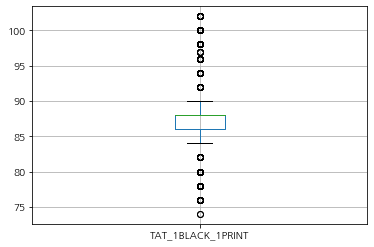

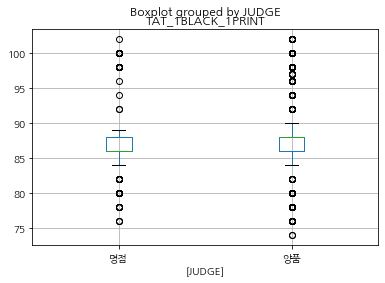

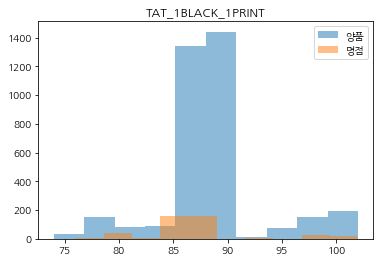

Series([], Name: JUDGE, dtype: object)

TAT_1BLACK_2RTD
upper 502
Counter({'양품': 429, '명점': 73})
---------------------------------------------------------------
lower 30
Counter({'양품': 29, '명점': 1})
---------------------------------------------------------------
양품 median: 220.0
불량 median: 220.0


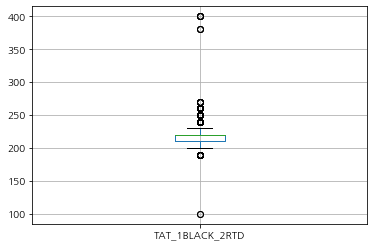

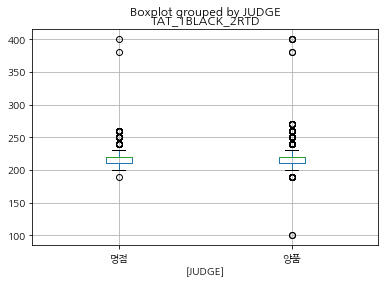

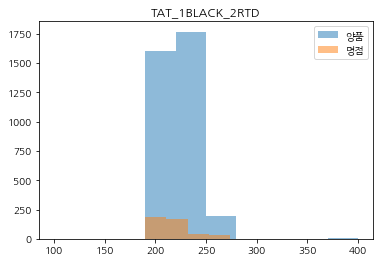

Series([], Name: JUDGE, dtype: object)

TAT_2AG_1PRINT
upper 312
Counter({'양품': 270, '명점': 42})
---------------------------------------------------------------
lower 342
Counter({'양품': 265, '명점': 77})
---------------------------------------------------------------
양품 median: 84.0
불량 median: 84.0


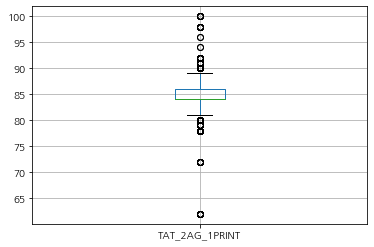

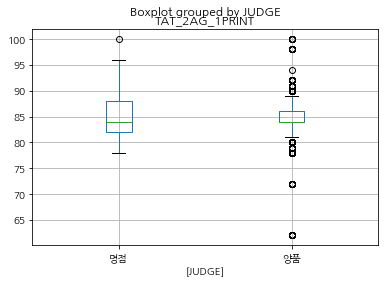

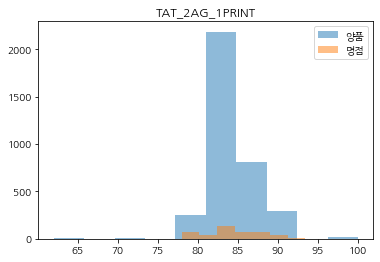

Series([], Name: JUDGE, dtype: object)

TAT_2AG_2RTD
upper 83
Counter({'양품': 79, '명점': 4})
---------------------------------------------------------------
lower 31
Counter({'양품': 28, '명점': 3})
---------------------------------------------------------------
양품 median: 69.0
불량 median: 69.0


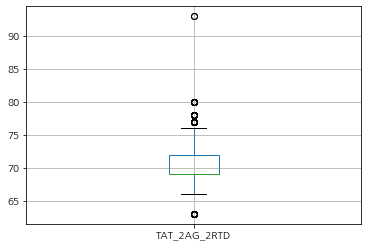

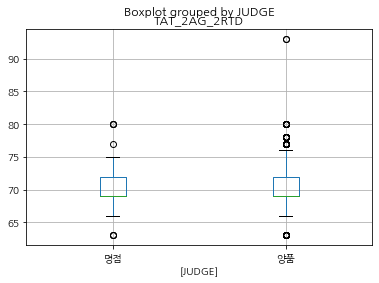

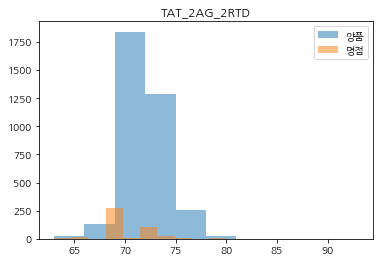

Series([], Name: JUDGE, dtype: object)

TAT_2AG_3EXPOSURE
upper 173
Counter({'양품': 144, '명점': 29})
---------------------------------------------------------------
lower 0
Counter()
---------------------------------------------------------------
양품 median: 152.0
불량 median: 152.0


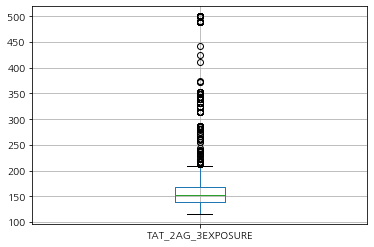

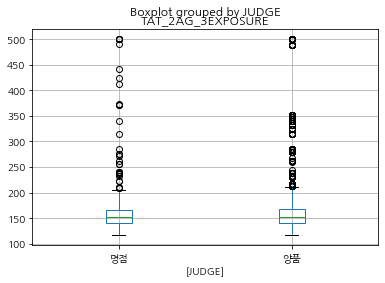

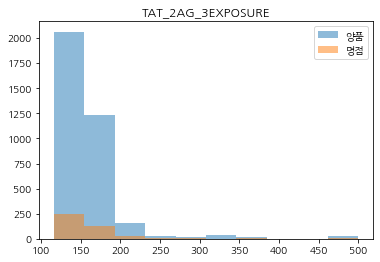

Series([], Name: JUDGE, dtype: object)

TAT_3BUS_1DEVELOP
upper 0
Counter()
---------------------------------------------------------------
lower 1
Counter({'명점': 1})
---------------------------------------------------------------
양품 median: 372.0
불량 median: 368.0


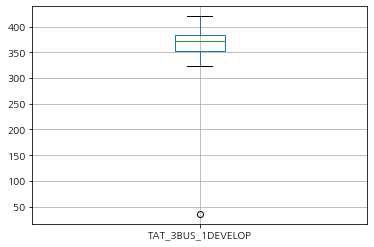

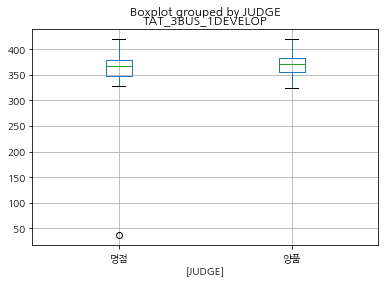

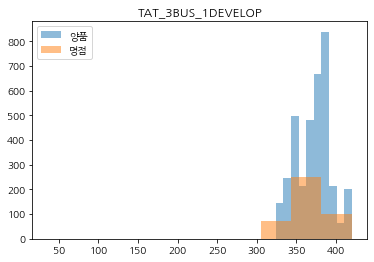

Series([], Name: JUDGE, dtype: object)

TAT_3BUS_2FIRE
upper 496
Counter({'양품': 457, '명점': 39})
---------------------------------------------------------------
lower 1
Counter({'양품': 1})
---------------------------------------------------------------
양품 median: 6900.0
불량 median: 6927.0


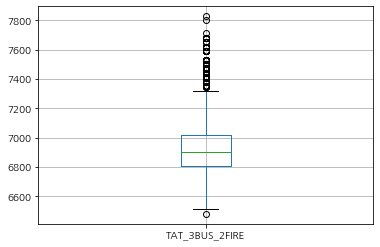

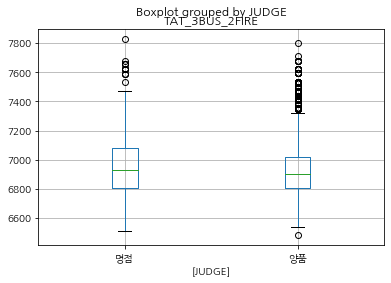

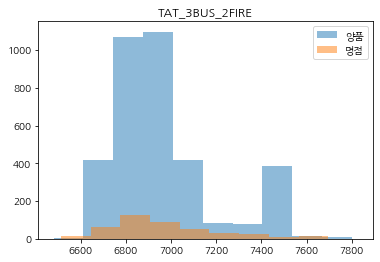

Series([], Name: JUDGE, dtype: object)

TAT_4DIELEC_FIRE
upper 105
Counter({'명점': 90, '양품': 15})
---------------------------------------------------------------
lower 0
Counter()
---------------------------------------------------------------
양품 median: 6480.0
불량 median: 6513.0


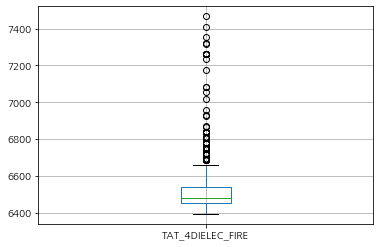

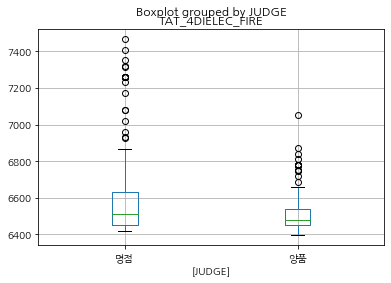

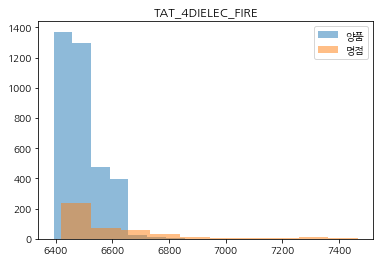

Series([], Name: JUDGE, dtype: object)

TAT_5MGO
upper 12
Counter({'양품': 12})
---------------------------------------------------------------
lower 61
Counter({'양품': 57, '명점': 4})
---------------------------------------------------------------
양품 median: 530.0
불량 median: 530.0


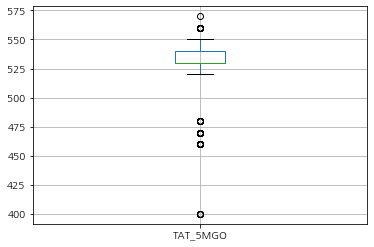

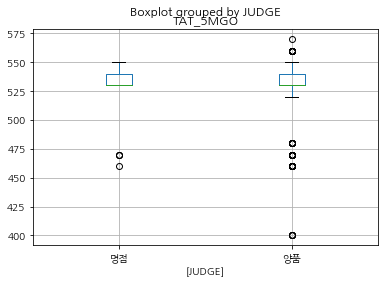

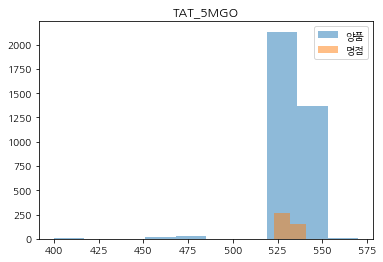

Series([], Name: JUDGE, dtype: object)

TAT_6PHOS_1R_1DISPENSER
upper 534
Counter({'양품': 461, '명점': 73})
---------------------------------------------------------------
lower 13
Counter({'양품': 13})
---------------------------------------------------------------
양품 median: 80.0
불량 median: 80.0


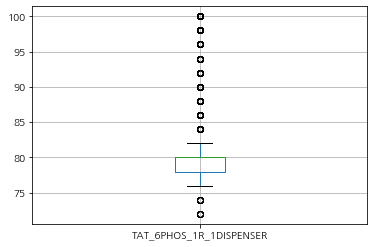

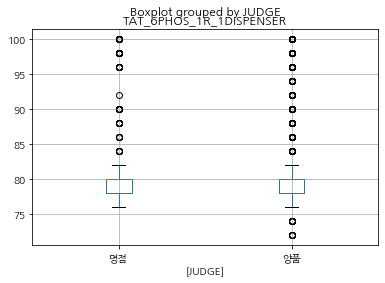

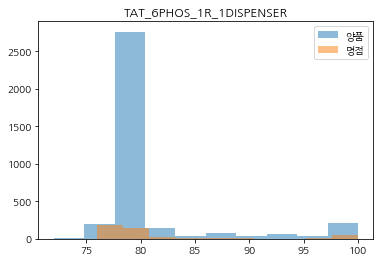

Series([], Name: JUDGE, dtype: object)

TAT_6PHOS_1R_2DRY
upper 289
Counter({'양품': 254, '명점': 35})
---------------------------------------------------------------
lower 0
Counter()
---------------------------------------------------------------
양품 median: 390.0
불량 median: 393.0


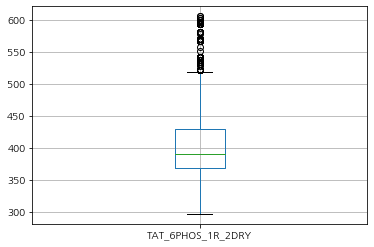

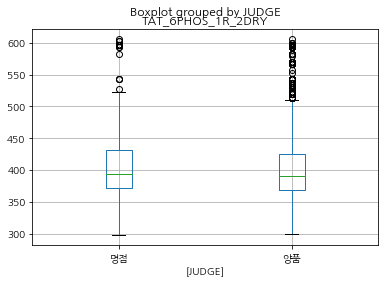

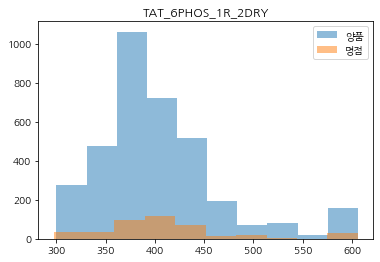

Series([], Name: JUDGE, dtype: object)

TAT_6PHOS_2G_1DISPENSER
upper 565
Counter({'양품': 494, '명점': 71})
---------------------------------------------------------------
lower 6
Counter({'양품': 5, '명점': 1})
---------------------------------------------------------------
양품 median: 78.0
불량 median: 78.0


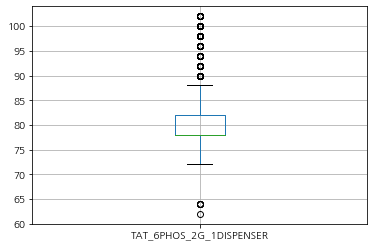

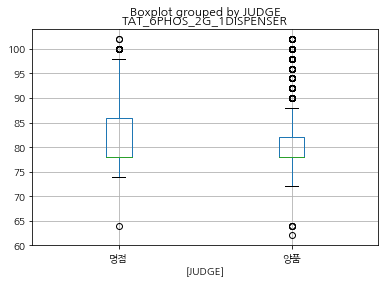

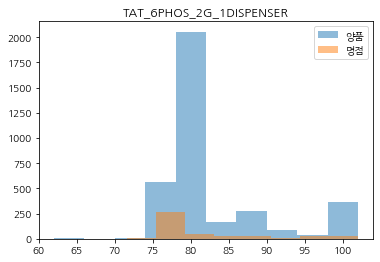

Series([], Name: JUDGE, dtype: object)

TAT_6PHOS_2G_2DRY
upper 0
Counter()
---------------------------------------------------------------
lower 290
Counter({'양품': 252, '명점': 38})
---------------------------------------------------------------
양품 median: 396.0
불량 median: 396.0


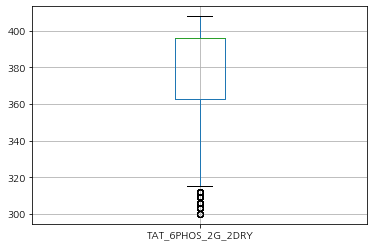

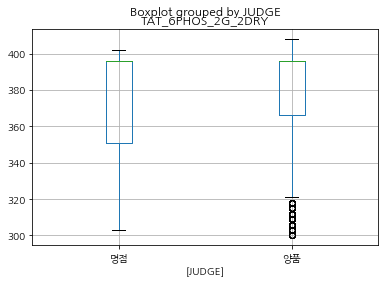

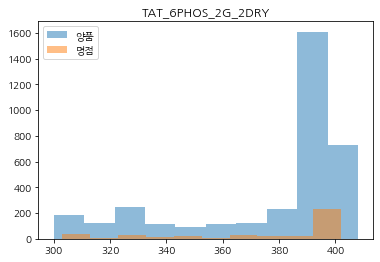

Series([], Name: JUDGE, dtype: object)

TAT_6PHOS_3B_1DISPENSER
upper 392
Counter({'양품': 334, '명점': 58})
---------------------------------------------------------------
lower 452
Counter({'양품': 327, '명점': 125})
---------------------------------------------------------------
양품 median: 84.0
불량 median: 84.0


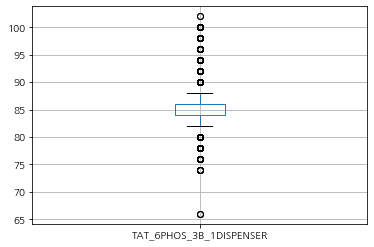

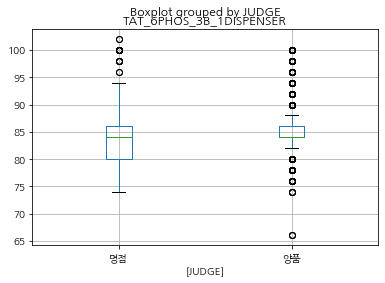

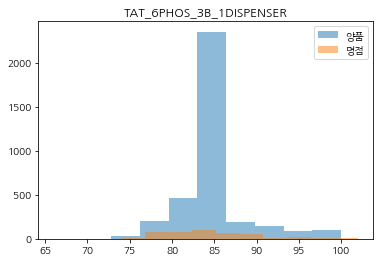

Series([], Name: JUDGE, dtype: object)

TAT_6PHOS_4FIRE
upper 170
Counter({'양품': 147, '명점': 23})
---------------------------------------------------------------
lower 0
Counter()
---------------------------------------------------------------
양품 median: 7110.0
불량 median: 6990.0


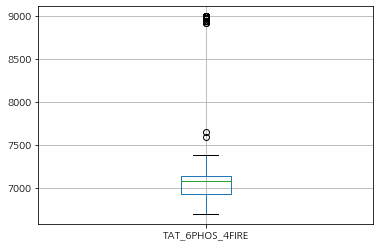

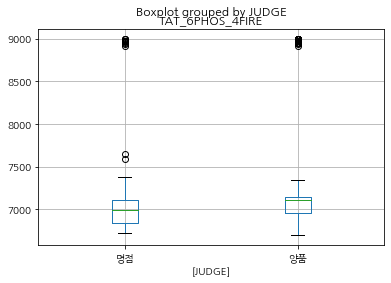

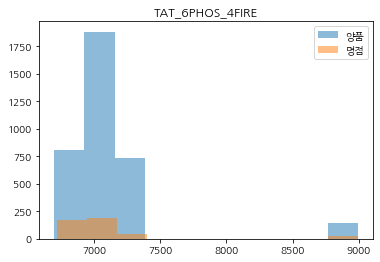

Series([], Name: JUDGE, dtype: object)

TAT_7PASTE
upper 0
Counter()
---------------------------------------------------------------
lower 0
Counter()
---------------------------------------------------------------
양품 median: 0.0
불량 median: 0.0


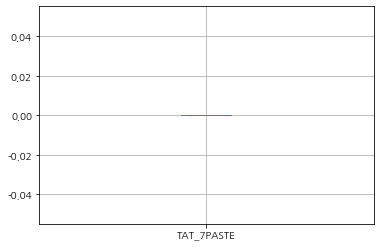

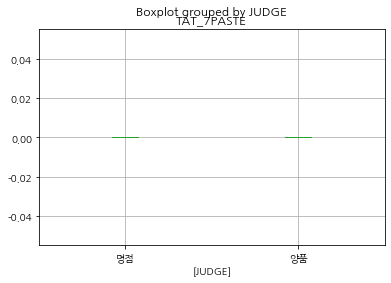

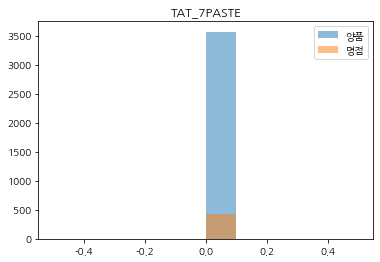

Series([], Name: JUDGE, dtype: object)

TAT_8AGING
upper 32
Counter({'양품': 20, '명점': 12})
---------------------------------------------------------------
lower 0
Counter()
---------------------------------------------------------------
양품 median: 10074.0
불량 median: 10074.0


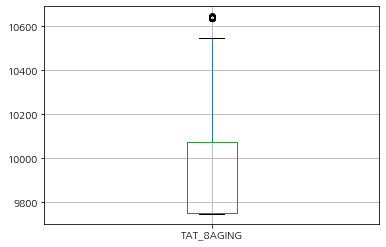

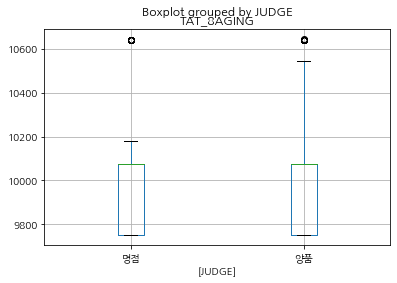

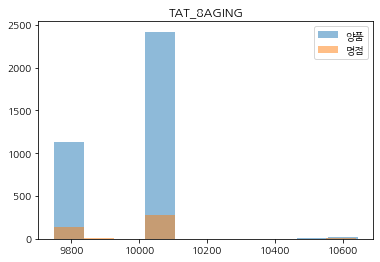

Series([], Name: JUDGE, dtype: object)



In [83]:
list_temp=['TAT_1BLACK_1PRINT', 'TAT_1BLACK_2RTD', 'TAT_2AG_1PRINT',
       'TAT_2AG_2RTD', 'TAT_2AG_3EXPOSURE', 'TAT_3BUS_1DEVELOP',
       'TAT_3BUS_2FIRE', 'TAT_4DIELEC_FIRE', 'TAT_5MGO',
       'TAT_6PHOS_1R_1DISPENSER', 'TAT_6PHOS_1R_2DRY',
       'TAT_6PHOS_2G_1DISPENSER', 'TAT_6PHOS_2G_2DRY',
       'TAT_6PHOS_3B_1DISPENSER', 'TAT_6PHOS_4FIRE', 'TAT_7PASTE',
       'TAT_8AGING']

def count_outlier(val, q25, q75):
    print('upper',final[final[val]>(q75+(1.5*(q75-q25)))][val].count())
    print(Counter(final[final[val]>(q75+(1.5*(q75-q25)))]['JUDGE']))
    print('---------------------------------------------------------------')
    print('lower',final[final[val]<(q25-(1.5*(q75-q25)))][val].count())
    print(Counter(final[final[val]<(q25-(1.5*(q75-q25)))]['JUDGE']))
    print('---------------------------------------------------------------')

for c in list_temp:
    if c == 'JUDGE':
        continue
    print(c)
    q75, q25 =  np.percentile(final[c],[75,25])
    count_outlier(c, q25, q75)
    final.boxplot(column = c)
    final.boxplot(column = c, by = ["JUDGE"])
    print('양품 median:', final[final['JUDGE'] == '양품'][c].median())
    print('불량 median:', final[final['JUDGE'] == '명점'][c].median())
    plt.show()
    fun_plot_hist(final, 'JUDGE', c)
    plt.show()
    print(final[final[c].isnull() == True]['JUDGE'])
    print("===============================================================\n")

In [84]:
final.to_csv("final_time.csv", encoding="cp949")